In [1]:

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

from online_algos import CRP

import pandas as pd
import matplotlib.pyplot as plt


PLOT_DATES_TEST_START = '2021-02-09'
PLOT_DATES_TEST_END = '2024-01-01'
# TODO need to fix first day off by one issue

ensemble_results_file = 'result.csv'

# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2022-12-30'

# ensemble_results_file = 'result2022.csv'


value_to_remove = "DOW"
# # Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# test = [
# "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT"]


df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


print(df.head())

# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for no-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (21112, 8)
         date        open        high         low       close    volume   tic  \
0  2021-02-09  136.619995  137.880005  135.850006  133.343353  76774200  AAPL   
1  2021-02-09  237.279999  237.669998  234.789993  210.427582   1996500  AMGN   
2  2021-02-09  127.650002  127.660004  126.199997  120.796021   2175000   AXP   
3  2021-02-09  210.600006  216.729996  208.899994  215.119995  13615700    BA   
4  2021-02-09  197.539993  198.660004  194.889999  183.065598   2331600   CAT   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  
Number of rows containing null values: 0
Check for no-nulls
True


In [2]:
df = pd.DataFrame(df)

print(df.dtypes)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)

(pivot_df / pivot_df.iloc[0,:]).plot()

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
             date        open        high         low       close    volume  \
0      2021-02-09  136.619995  137.880005  135.850006  133.343353  76774200   
1      2021-02-09  237.279999  237.669998  234.789993  210.427582   1996500   
2      2021-02-09  127.650002  127.660004  126.199997  120.796021   2175000   
3      2021-02-09  210.600006  216.729996  208.899994  215.119995  13615700   
4      2021-02-09  197.539993  198.660004  194.889999  183.065598   2331600   
...           ...         ...         ...         ...         ...       ...   
21107  2023-12-29  525.979980  528.239990  523.919983  520.342346   2080100   
21108  2023-12-29  260.570007  261.459991  259.670013  258.866302   4074600   
21109  2023-12-29   37.380001   37.759998   37.320000   35.344772  16205200   
21110  2023-12-29   26.440001   26.629999   25.75000

<Axes: xlabel='date'>

In [3]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())

print(result.B)
print(result.X)

%matplotlib inline
result.plot();

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.62 ± 0.64
    Ulcer index: 1.35
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.62 ± 0.64
    Appraisal ratio (wrt benchmark): 0.00 ± 0.69
    Beta / Alpha: 1.00 / 0.000%
    Annualized return: 9.25%
    Annualized volatility: 15.04%
    Longest drawdown: 388 days
    Max drawdown: 21.56%
    Winning days: 53.0%
    Annual turnover: 2.3
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.09
    Sharpe ratio: 0.60 ± 0.64
    Ulcer index: 1.29
    Information ratio (wrt benchmark): -48.86
    Benchmark sharpe: 0.62 ± 0.64
    Appraisal ratio (wrt benchmark): -2.18 ± 0.59
    Beta / Alpha: 1.00 / -0.228%
    Annualized return: 9.02%
    Annualized volatility: 15.04%
    Longest drawdown: 477 days
    Max drawdown: 21.71%
    Winning days: 53.0%
    Annual turnover: 2.3
        
tic             AAPL      AMGN       AXP        BA       CAT       CRM  \
date                                                                     
2021-02-09  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-10  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-11  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-12  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-16  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
...              ...       ...       ...       ...       

['Date', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]
Total of each: [34402.58514404297 34299.69583129883 34426.86584472656 34419.19921875
 34416.33233642578 34405.46273803711 34448.0793762207 34439.05226135254
 34359.624755859375 34200.29067993164 34335.181396484375 34282.00744628906
 34404.90776062012 34428.98377990723 34318.54814147949 34421.50884246826
 34419.25466918945 34315.61752319336 34412.933166503906 34440.562843322754
 34235.10047912598 34365.141021728516 34351.94305419922 34366.28372192383
 34375.97015

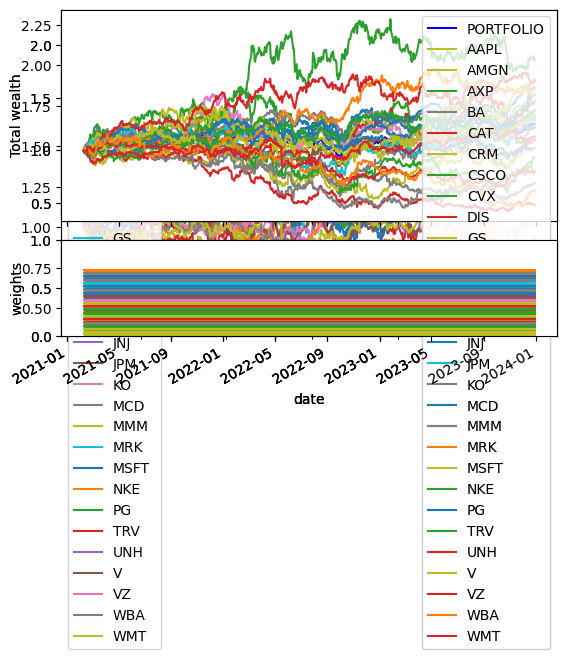

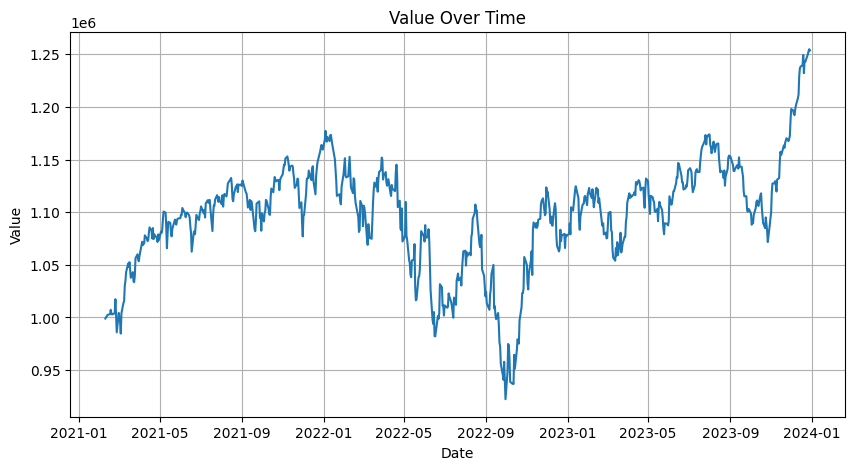

In [4]:
############################
# Run CRP for one defined set of weights:
############################


import numpy as np
import pandas as pd

# Best Target Weights: [0.05134159 0.05536591 0.03931186 0.00328734 0.03819066 0.03555904
#  0.07138025 0.04149361 0.00340795 0.01783727 0.04918175 0.03040992
#  0.06165634 0.00179018 0.05213284 0.00264511 0.0477926  0.00020151
#  0.01354131 0.03167825 0.07287608 0.04810141 0.04723473 0.05420885
#  0.03467866 0.02201975 0.0513923  0.01362611 0.00765681]

new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]

print(new_column_names)

# Convert to the desired format
X = pivot_df.reset_index()
X.columns = new_column_names

# Uniform base case
target_weights = np.ones(len(X.columns)-1) / (len(X.columns)-1)  # target weights for each asset

print(target_weights)

# TODO adjust this to the correct value
transaction_cost = 0.001

# Number of steps before the portfolio is allowed to rerebalance
rebalance_step = 1

# TODO still nto as good as a simple buy and hold
initial_cash = 1000000
initial_shares = np.zeros(len(target_weights))

net_worth=[]
transaction_fees=[]

def rebalance_portfolio(cash, shares, target_weights, prices):
    
    # Available amount for purchases of each stock, must factor in the transaction cost 
    current_wealth = (np.sum(prices * shares) + cash) / (1 + transaction_cost)

    target_values = (target_weights * current_wealth)
    target_shares = target_values // (prices)

    shares_to_change = target_shares - shares
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)

    # Calculate cash after selling shares
    cash += np.sum(sell_shares * prices)

    cash -= np.sum(buy_shares * prices)

    transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
    # Sum up all the transaction fees
    transaction_fees.append(transaction_fee)

    shares = target_shares
    remaining_cash = cash - transaction_fee

    assert remaining_cash >= 0
    
    return shares, remaining_cash

portfolio_shares = initial_shares.copy()
portfolio_cash = initial_cash

rebalance_i = 0
# Rebalance at each month
for idx, row in X.iterrows():
    # print(f"\nRebalancing on {row[0].strftime('%Y-%m-%d')}")
    price_per_share = row[1:].values

    rebalance_i -= 1
    if rebalance_i <= 0:
        portfolio_shares, portfolio_cash = rebalance_portfolio(
            portfolio_cash, portfolio_shares, target_weights, price_per_share)
        rebalance_i = rebalance_step
    # print(f"New Portfolio Shares: {portfolio_shares}")
    # print(f"Prices: {row}")

    # print(f"Total of each: {portfolio_shares * price_per_share}")
    # print(f"Cash: {portfolio_cash:.2f}")

    # Calculate total shares
    total_shares = np.sum(portfolio_shares)

    # Calculate the ratio of each share
    share_ratios = portfolio_shares / total_shares

    print(f"Total of each: {portfolio_shares * price_per_share}")
    print(target_weights)
    

    asset_wealth = np.sum(portfolio_shares * price_per_share)
    print(asset_wealth)

    net_worth.append(asset_wealth + portfolio_cash)

print("\nFinal Portfolio:")
print(f"Shares: {portfolio_shares}")
print(f"Total of each: {portfolio_shares * price_per_share}")
print(f"Cash: {portfolio_cash:.2f}")
print(f"Transaction fees: {np.sum(np.array(transaction_fees))}")


print(f"Final Net Worth: {net_worth[-1]}")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


# Write this out to a csv file, with date and net worth
df = pd.DataFrame(net_worth, columns=['CRP_net_worth'])
if len(df) == len(X):
    df['Date'] = X['Date']
    df.set_index('Date', inplace=True)
else:
    raise ValueError("DataFrames do not have the same number of rows.")
df.to_csv('CRP_net_worth.csv')


# TODO implement CRP directly into the Gym environment

In [27]:

from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback
from typing import Any, ClassVar, Dict, Iterable, List, Optional, Tuple, Type, TypeVar, Union


class CRPModel:
    def __init__(
            self, 
            env: Union[GymEnv, str],
            policy: Any, # Policy doesnt matter here
            device: str, # device doesnt matter here
            policy_kwargs: Optional[Dict[str, Any]] = None # policy_kwargs doesnt matter here
            ) -> None:
        
        # Super simple algorithm, we only need the environment
        # This environment needs to have prices for the CRP algorithm TODO check the type here

        assert env is not None 
        self.env = env

        # Pull out the actions space dimensions for the portfolio
        self.action_space_shape = self.env.action_space.shape
        self.portfolio_length = self.action_space_shape[0]

        # Calculate the inital weights, (defualt to uniform)
        # Uniform base case
        # Note these are the first weight reprsents the cash account, which should always be 0
        self.target_weights = np.ones(self.portfolio_length-1) / (self.portfolio_length-1)  # target weights for each asset

        # Append 0 to the beginning, for an empty cash account
        self.target_weights = np.insert(self.target_weights, 0, 0)
        


    def train(self) -> None:
        # TODO this model is derministic and doesnt learn anything, it only predicts
        pass

    def learn(
        self
    ):
        # TODO this model is derministic and doesnt learn anything, it only predicts
        pass

    def predict(
        self,
        observation: Union[np.ndarray, Dict[str, np.ndarray]],
        state: Optional[Tuple[np.ndarray, ...]] = None,
        episode_start: Optional[np.ndarray] = None,
        deterministic: bool = False, # TODO not needed this is always determininistic
    ) -> Tuple[np.ndarray, Optional[Tuple[np.ndarray, ...]]]:

        # TODO much of this comes from the policies class in stable baselines
        if isinstance(observation, tuple) and len(observation) == 2 and isinstance(observation[1], dict):
            raise ValueError(
                "You have passed a tuple to the predict() function instead of a Numpy array or a Dict. "
                "You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) "
                "vs `obs = vec_env.reset()` (SB3 VecEnv). "
                "See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 "
                "and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api"
            )
        
        # We always just return the target CRP weights
        actions = self.target_weights.reshape(1, self.portfolio_length)

        # The state doesnt matter here
        return actions, None


In [28]:
from stable_baselines3 import PPO

MODELS = {"ppo": PPO, "crp": CRPModel}

class DRLStableAgent:
    """Implementation for DRL algorithms for portfolio optimization.

    Note:
        During testing, the agent is optimized through online learning.
        The parameters of the policy is updated repeatedly after a constant
        period of time. To disable it, set learning rate to 0.

    Attributes:
        env: Gym environment class.
    """

    def __init__(self, env):
        """Agent initialization.

        Args:
            env: Gym environment to be used in training.
        """
        self.env = env

    def get_model(
        self, model_name, device="cpu", model_kwargs=None, policy_kwargs=None
    ):
        """Setups DRL model.

        Args:
            model_name: Name of the model according to MODELS list.
            device: Device used to instantiate neural networks.
            model_kwargs: Arguments to be passed to model class.
            policy_kwargs: Arguments to be passed to policy class.

        Note:
            model_kwargs and policy_kwargs are dictionaries. The keys must be strings
            with the same names as the class arguments. Example for model_kwargs::

            { "lr": 0.01, "policy": EIIE }

        Returns:
            An instance of the model.
        """
        if model_name not in MODELS:
            raise NotImplementedError("The model requested was not implemented.")

        model = MODELS[model_name]
        model_kwargs = {} if model_kwargs is None else model_kwargs
        policy_kwargs = {} if policy_kwargs is None else policy_kwargs

        # add device settings
        model_kwargs["device"] = device
        #policy_kwargs["device"] = device

        # add policy_kwargs inside model_kwargs
        model_kwargs["policy_kwargs"] = policy_kwargs

        # TODO default to usethe MlpPolicy
        return model(env=self.env, policy="MlpPolicy", **model_kwargs)

    @staticmethod
    def train_model(model, env, episodes=1):
        """Trains portfolio optimization model.

        Args:
            model: Instance of the model.
            episoded: Number of episodes.

        Returns:
            An instance of the trained model.
        """
        max_steps = len(env._df['date'].unique())

        print("Max number of time steps in an episode: ", max_steps)

        model.learn(
            total_timesteps = max_steps * episodes # TODO fix this
        )
        return model

    @staticmethod
    def DRL_prediction(model, env, deterministic=True):
        """make a prediction and get results"""
        test_env, test_obs = env.get_sb_env()
        
        

        test_env.reset()
        max_steps = len(env._df['date'].unique())

        validation_assets = None
        validation_dates = None

        for i in range(max_steps):
            action, _states = model.predict(test_obs, deterministic=deterministic)
            print(action)
            print(type(action))

            # Pull out the latest assets and dates
            validation_assets = env._asset_memory["final"]
            validation_dates = env._date_memory

            # account_memory = test_env.env_method(method_name="save_asset_memory")
            # actions_memory = test_env.env_method(method_name="save_action_memory")
            test_obs, rewards, dones, info = test_env.step(action)

            if dones[0]:
                print("hit end!")
                break
        
        return validation_assets, validation_dates

In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER

# from finrl.agents.portfolio_optimization.architectures import EIIE

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

# import sys
# sys.path.append("../FinRL-Library")

import itertools

TRAIN_START_DATE = '2009-04-01'
TRAIN_END_DATE = '2020-12-31'
TEST_START_DATE = '2021-01-01'
TEST_END_DATE = '2024-01-01'

# TRAIN_START_DATE = '2010-01-01'
# TRAIN_END_DATE = '2021-10-01'
# TEST_START_DATE = '2021-10-01'
# TEST_END_DATE = '2023-03-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER


# TODO Drop the DOW stock
value_to_remove = "DOW"
# Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]
print(DOW_30_TICKER)

# No time window needed for PPO
# TIME_WINDOW = 25
COMMISSION_FEE_PERCENT = 0.001
INITIAL_CASH = 1000000

# TODO try different date ranges
# TRAIN_START_DATE = '2009-01-01'
# TRAIN_END_DATE = '2018-10-01'
# TEST_START_DATE = '2018-10-01'
# TEST_END_DATE = '2021-03-01'

raw_df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()


from sklearn.preprocessing import MaxAbsScaler
from finrl.meta.preprocessor.preprocessors import GroupByScaler

portfolio_norm_df = GroupByScaler(by="tic", scaler=MaxAbsScaler).fit_transform(raw_df)
portfolio_norm_df

df_train = portfolio_norm_df[(portfolio_norm_df["date"] >= TRAIN_START_DATE) & (portfolio_norm_df["date"] <= TRAIN_END_DATE)]
df_2021 = portfolio_norm_df[(portfolio_norm_df["date"] >= TEST_START_DATE) & (portfolio_norm_df["date"] <= "2021-12-31")]
df_2022 = portfolio_norm_df[(portfolio_norm_df["date"] >= "2022-01-01") & (portfolio_norm_df["date"] <= "2022-12-31")]
df_2023 = portfolio_norm_df[(portfolio_norm_df["date"] >= "2023-01-01") & (portfolio_norm_df["date"] < TEST_END_DATE)]

from finrl.meta.env_portfolio_optimization.env_portfolio_opt_stable import PortfolioOptStableEnv

environment = PortfolioOptStableEnv(
        df_train,
        initial_amount=INITIAL_CASH,
        comission_fee_pct=COMMISSION_FEE_PERCENT,
        # time_window=TIME_WINDOW,
        features=["close", "high", "low"],
        normalize_df=None
    )

CRP_results = {
    "date": {},
    "training": {},
    "2021": {},
    "2022": {},
    "2023": {}
}


environment_2021 = PortfolioOptStableEnv(
    df_2021,
    initial_amount=INITIAL_CASH,
    comission_fee_pct=COMMISSION_FEE_PERCENT,
    # time_window=TIME_WINDOW,
    features=["close", "high", "low"],
    normalize_df=None
)


environment_2022 = PortfolioOptStableEnv(
    df_2022,
    initial_amount=INITIAL_CASH,
    comission_fee_pct=COMMISSION_FEE_PERCENT,
    # time_window=TIME_WINDOW,
    features=["close", "high", "low"],
    normalize_df=None
)

environment_2023 = PortfolioOptStableEnv(
    df_2023,
    initial_amount=INITIAL_CASH,
    comission_fee_pct=COMMISSION_FEE_PERCENT,
    # time_window=TIME_WINDOW,
    features=["close", "high", "low"],
    normalize_df=None
)


agent_crp = DRLStableAgent(env = environment)
model_crp = agent_crp.get_model("crp", None, None)


# Training
values, dates = DRLStableAgent.DRL_prediction(model_crp, environment)
CRP_results["training"] = environment._terminal_asset_memory["final"]
CRP_results["date"] = environment._terminal_date_memory

# 2021
values, dates = DRLStableAgent.DRL_prediction(model_crp, environment_2021)
CRP_results["2021"]["value"] = environment_2021._terminal_asset_memory["final"]
CRP_results["2021"]["date"] = environment_2021._terminal_date_memory


# 2022
values, dates = DRLStableAgent.DRL_prediction(model_crp, environment_2022)
CRP_results["2022"]["value"] = environment_2022._terminal_asset_memory["final"]
CRP_results["2022"]["date"] = environment_2022._terminal_date_memory

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

Shape of DataFrame:  (107677, 8)


c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\finrl\meta\preprocessor\preprocessors.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.31332941 0.43188074 0.33824661 ... 0.02556499 0.01810204 0.02266286]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[select_mask, self.columns] = self.scalers[value].transform(
c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\finrl\meta\preprocessor\preprocessors.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.5  0.75 1.   ... 0.5  0.75 1.  ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X.loc[select_mask, self.columns] = self.scalers[value].transform(
c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: 

[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448

c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448

c:\Users\bencj\Desktop\Econ4\Thesis\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]
<class 'numpy.ndarray'>
[[0.         0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
  0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448

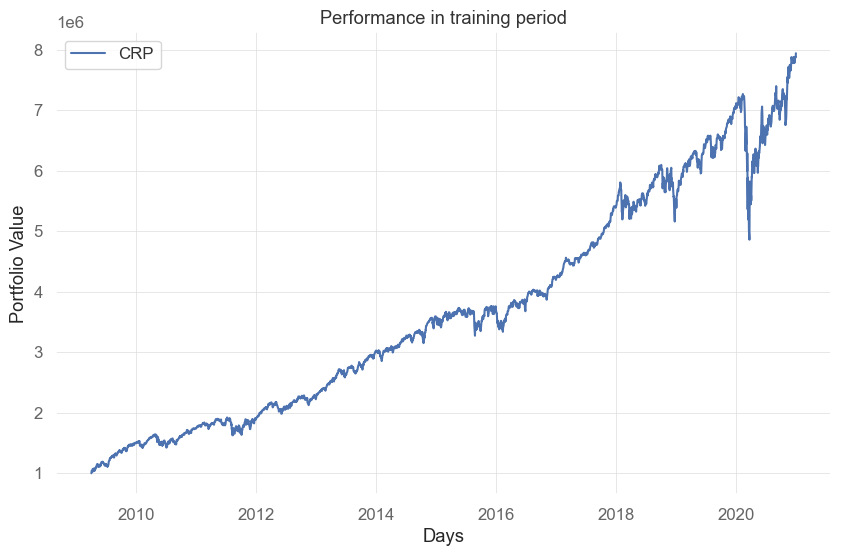

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(CRP_results["date"], CRP_results["training"], label="CRP")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in training period")
plt.legend()

plt.show()

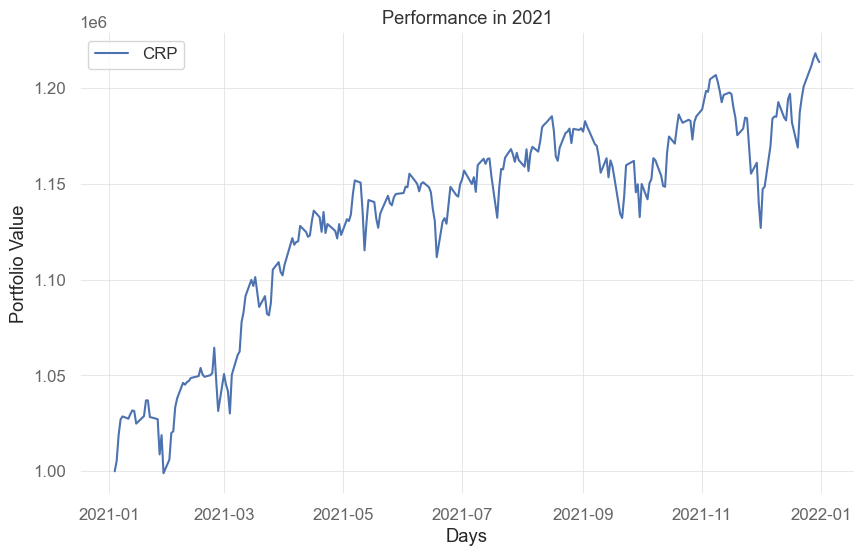

In [40]:
plt.plot(CRP_results["2021"]["date"], CRP_results["2021"]["value"], label="CRP")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2021")
plt.legend()

plt.show()

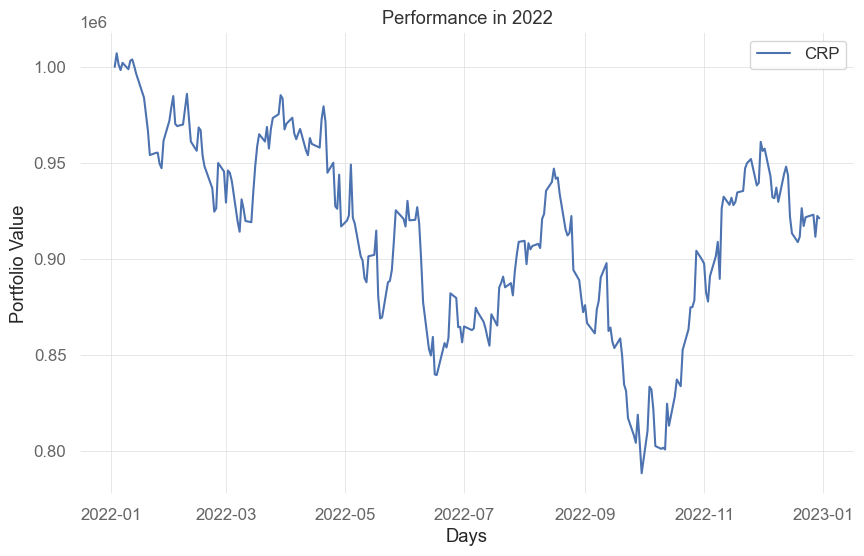

In [41]:
plt.plot(CRP_results["2022"]["date"], CRP_results["2022"]["value"], label="CRP")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in 2022")
plt.legend()

plt.show()

In [42]:
# #####################################################
# # BCRP - Run it many times and find the best random weights
# #####################################################

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# def prepare_data(pivot_df):
#     new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]
#     X = pivot_df.reset_index()
#     X.columns = new_column_names
#     return X

# def rebalance_portfolio(cash, shares, target_weights, prices, transaction_cost=0.001):
#     current_wealth = np.sum(prices * shares) + cash / (1 + transaction_cost)
#     target_values = target_weights * current_wealth
#     target_shares = target_values // prices
#     shares_to_change = target_shares - shares
#     sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
#     buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    
#     cash += np.sum(sell_shares * prices)
#     cash -= np.sum(buy_shares * prices)

#     transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
#     shares = target_shares
#     remaining_cash = cash - transaction_fee

#     assert remaining_cash >= 0
    
#     return shares, remaining_cash

# # Note I am rebalancing every X days, this often does even better by optimizing for the best BAH weights and not rebalancing
# def evaluate_portfolio(X, target_weights, initial_cash=1000000, rebalance_step=1):
#     initial_shares = np.zeros(len(target_weights))
#     portfolio_shares = initial_shares.copy()
#     portfolio_cash = initial_cash
#     net_worth = []
#     rebalance_i = 0
    
#     for _, row in X.iterrows():
#         price_per_share = row[1:].values
#         rebalance_i -= 1
#         if rebalance_i <= 0:
#             portfolio_shares, portfolio_cash = rebalance_portfolio(
#                 portfolio_cash, portfolio_shares, target_weights, price_per_share)
#             rebalance_i = rebalance_step
        
#         asset_wealth = np.sum(portfolio_shares * price_per_share)
#         net_worth.append(asset_wealth + portfolio_cash)
    
#     return net_worth

# def find_best_weights(pivot_df, num_iterations=1000):
#     X = prepare_data(pivot_df)
#     best_net_worth = -np.inf
#     best_weights = None
    
#     for _ in range(num_iterations):
#         random_values = np.random.rand(len(X.columns) - 1)
#         target_weights = random_values / np.sum(random_values)
#         net_worth = evaluate_portfolio(X, target_weights)
#         final_net_worth = net_worth[-1]
        
#         if final_net_worth > best_net_worth:
#             best_net_worth = final_net_worth
#             best_weights = target_weights
    
#     return best_weights, best_net_worth

# # Find the best weights
# best_weights, best_net_worth = find_best_weights(pivot_df)

# # Evaluate portfolio with the best weights
# X = prepare_data(pivot_df)
# net_worth = evaluate_portfolio(X, best_weights)

# # Plotting the data
# plt.figure(figsize=(10, 5))
# plt.plot(X['Date'], net_worth)
# plt.title('Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

# print("\nBest Target Weights:", best_weights)
# print("Maximized Net Worth:", best_net_worth)




# # Write this out to a csv file, with date and net worth
# df = pd.DataFrame(net_worth, columns=['BCRP_net_worth'])
# if len(df) == len(X):
#     df['Date'] = X['Date']
#     df.set_index('Date', inplace=True)
# else:
#     raise ValueError("DataFrames do not have the same number of rows.")
# df.to_csv('BCRP_net_worth.csv')


In [43]:
# result = pd.DataFrame()

# df = pd.DataFrame(net_worth)

# print(df)

# # Combine the DataFrames side-by-side
# combined_df = pd.concat([X.Date, df], axis=1)

# combined_df.columns = ["Date", "BCRP Net Worth"]
# print(combined_df)

# combined_df.set_index('Date', inplace=True)

# # TODO Change result period to use saved file
# result = pd.read_csv(ensemble_results_file)

# result.set_index('date', inplace=True)

# result.index = pd.to_datetime(result.index)

# print(result)

# # Join DataFrames on date index
# merged_df = result.join(combined_df, how='inner')
# print(merged_df)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# merged_df.plot();

In [44]:
# from finrl.plot import backtest_stats,  get_baseline

# first_date = combined_df.index.min()
# last_date = combined_df.index.max()

# print("==============Get Baseline Stats===========")
# df_dji_ = get_baseline(
#         ticker="^DJI",
#         start = first_date,
#         end = last_date)

# stats = backtest_stats(df_dji_, value_col_name = 'close')


# df_dji = pd.DataFrame()
# df_dji['date'] = combined_df.index
# df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_cash
# print("df_dji: ", df_dji)
# df_dji = df_dji.set_index(df_dji.columns[0])
# print("df_dji: ", df_dji)


# combined_df = pd.DataFrame({'date': combined_df.index, 'CRP Net Worth': combined_df['BCRP Net Worth']})
# combined_df = combined_df.set_index('date')

# print("df_result_bah.columns: ", combined_df.columns)

# print("df_result_bah: ", combined_df)
# print("==============Compare to DJIA===========")
# result = pd.DataFrame()

# result = pd.merge(combined_df, df_dji, left_index=True, right_index=True)
# print("result: ", result)


# %matplotlib inline
# plt.rcParams["figure.figsize"] = (15,5)
# plt.figure();
# result.plot();